Saving 0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report (2).csv to 0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report (2) (1).csv
Saving 0.9ep3krj7s1o0.ona2jvufk4mMetadata (2).csv to 0.9ep3krj7s1o0.ona2jvufk4mMetadata (2) (1).csv
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026             

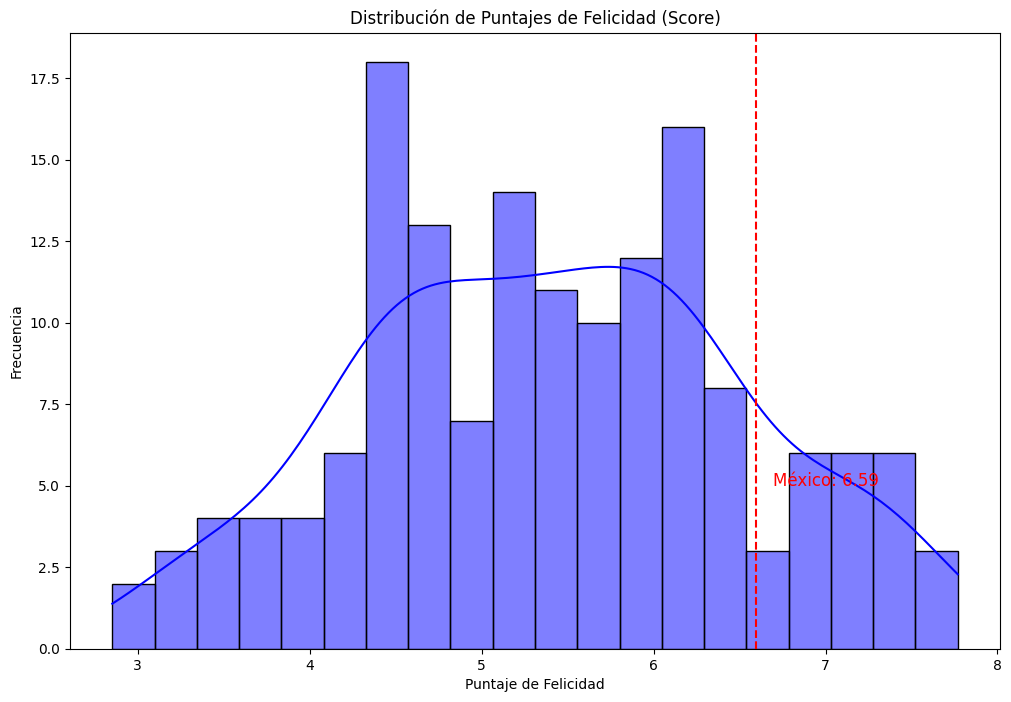

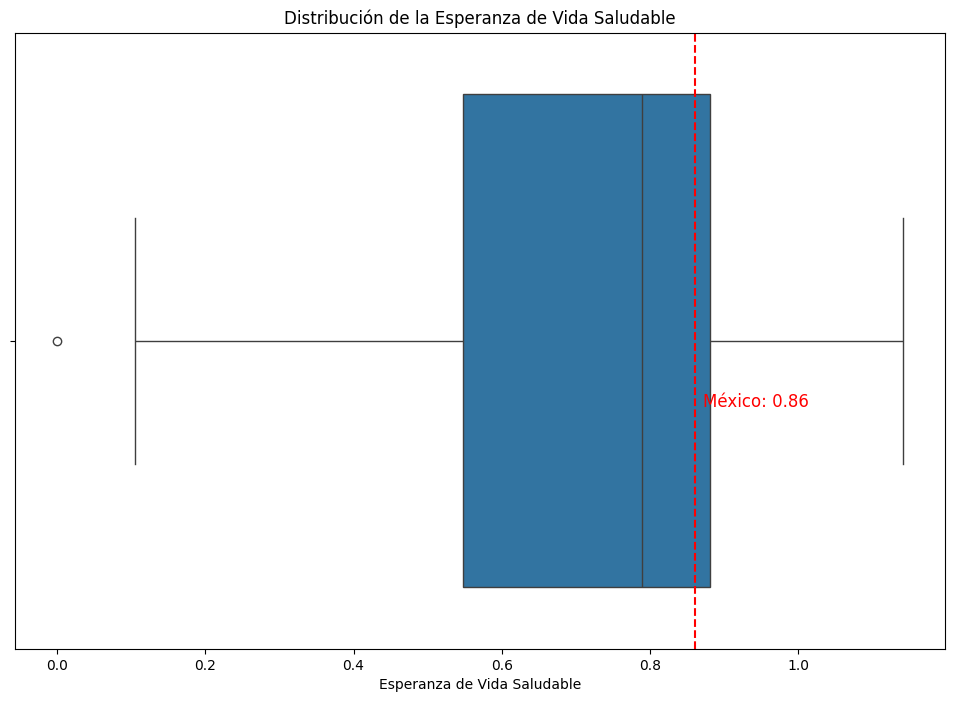

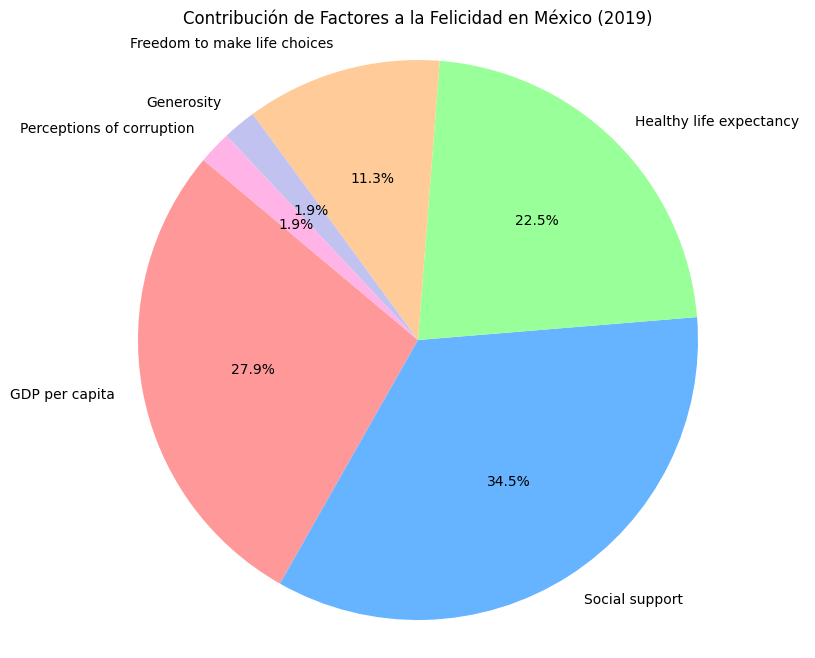

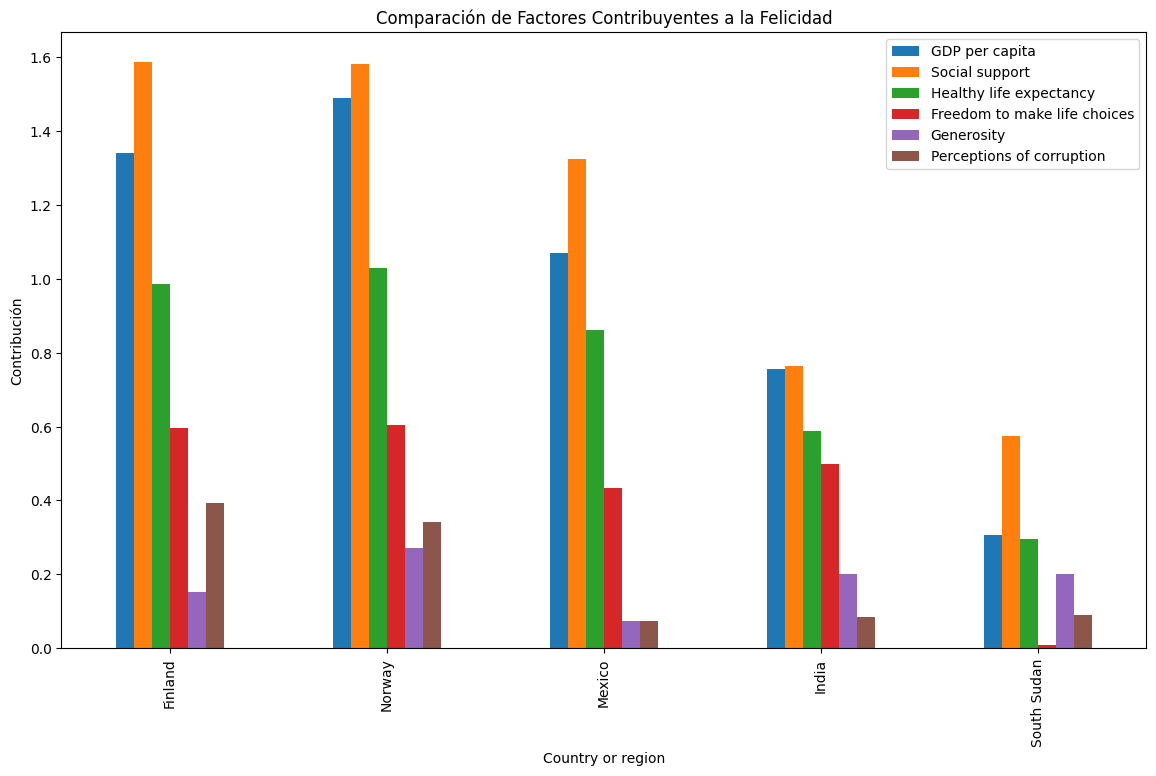

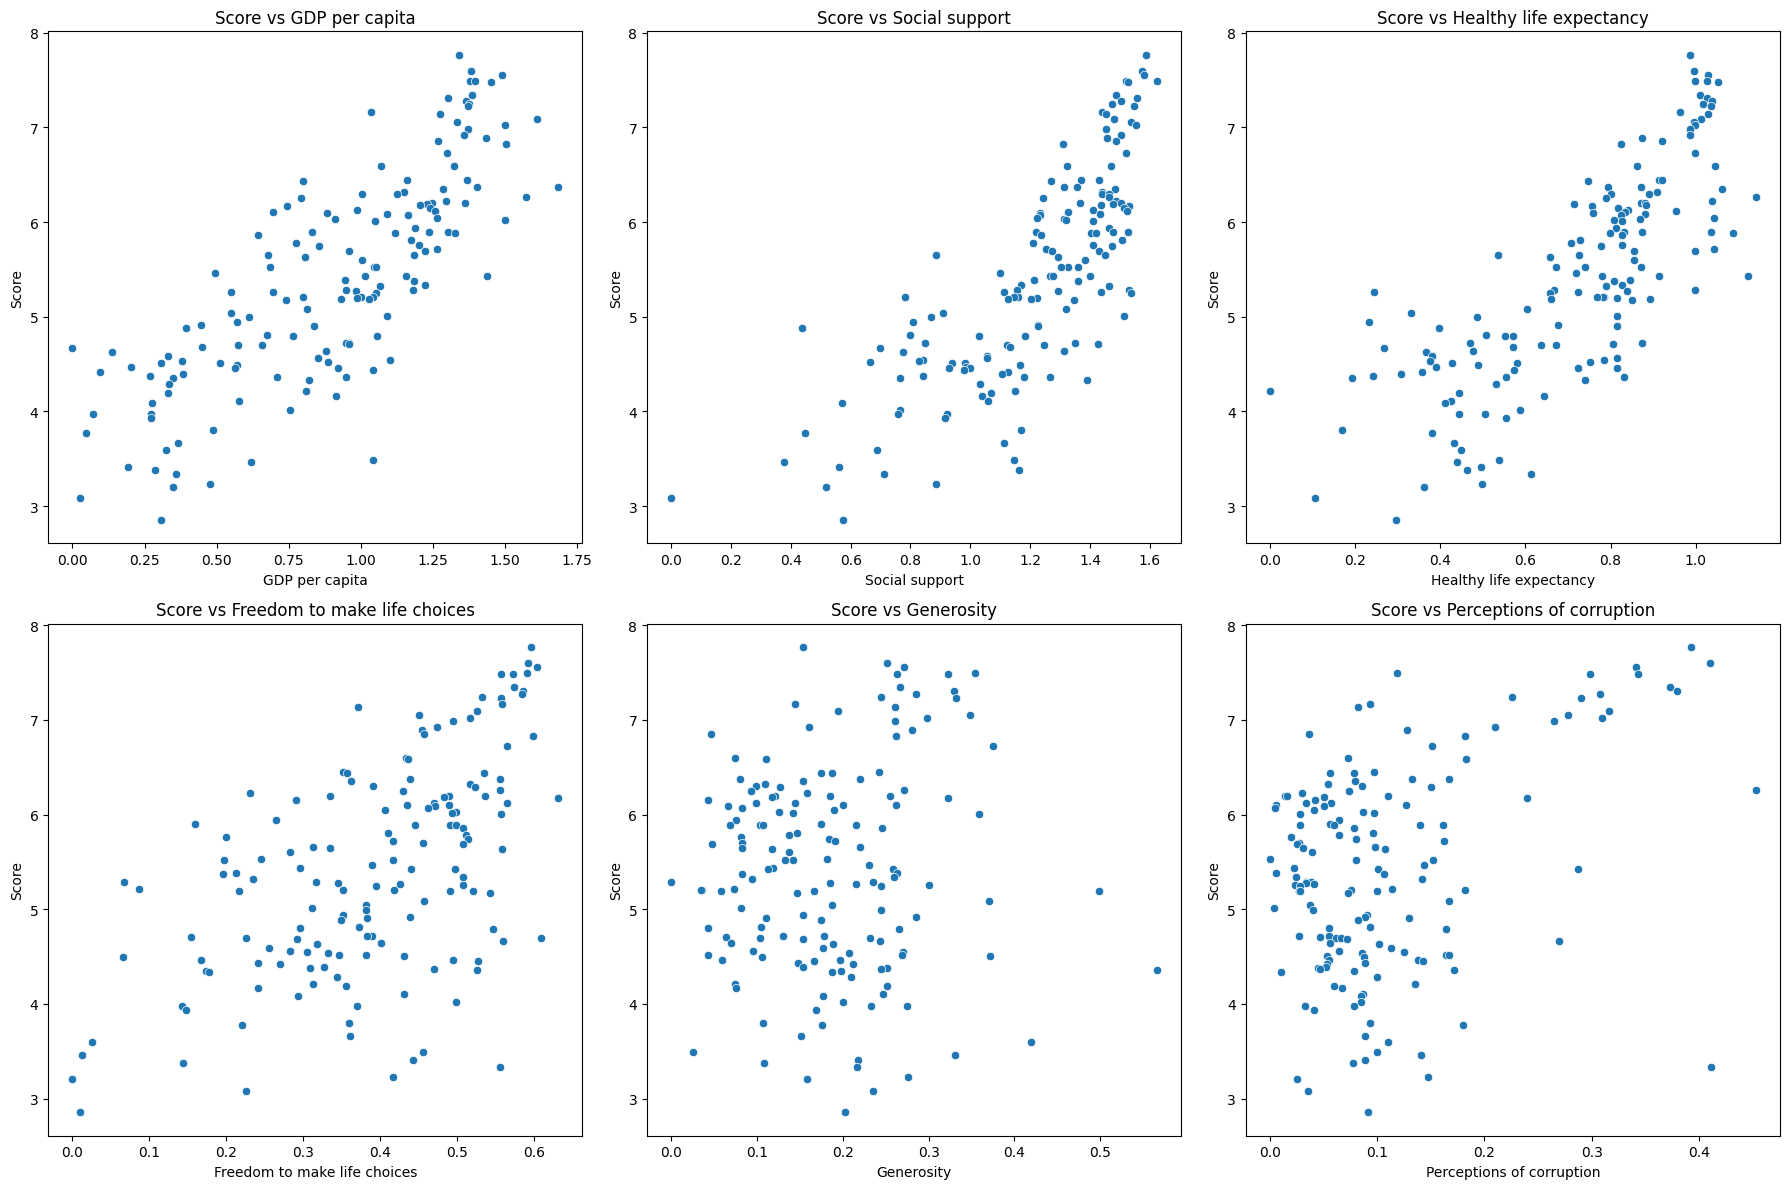

KeyError: 'Country'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir los archivos
uploaded = files.upload()

# Nombres de los archivos subidos
happiness_filename = '0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report (2).csv'
metadata_filename = '0.9ep3krj7s1o0.ona2jvufk4mMetadata (2).csv'

# Leer los datos y guardarlos en DataFrames
happiness = pd.read_csv(happiness_filename)
metadata = pd.read_csv(metadata_filename)

# Mostrar los primeros registros de cada archivo
print(happiness.head())
print(metadata.head())

# 1. Guardar en un DataFrame (happiness) todos los registros del archivo Happiness_report.csv.
# Ya está hecho al cargar el archivo en 'happiness'

# 2. A partir del DataFrame happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')
print(mexico)

# 3. Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.
mexico_score = mexico['Score'].values[0]
plt.figure(figsize=(12, 8))
sns.histplot(happiness['Score'], bins=20, kde=True, color='blue')
plt.axvline(mexico_score, color='red', linestyle='--')
plt.text(mexico_score + 0.1, 5, 'México: {:.2f}'.format(mexico_score), color='red', fontsize=12)
plt.title('Distribución de Puntajes de Felicidad (Score)')
plt.xlabel('Puntaje de Felicidad')
plt.ylabel('Frecuencia')
plt.show()

# 4. Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.
mexico_life_expectancy = mexico['Healthy life expectancy'].values[0]
plt.figure(figsize=(12, 8))
sns.boxplot(x=happiness['Healthy life expectancy'])
plt.axvline(mexico_life_expectancy, color='red', linestyle='--')
plt.text(mexico_life_expectancy + 0.01, 0.1, 'México: {:.2f}'.format(mexico_life_expectancy), color='red', fontsize=12, va='center')
plt.title('Distribución de la Esperanza de Vida Saludable')
plt.xlabel('Esperanza de Vida Saludable')
plt.show()

# 5. Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
mexico_factors = mexico[factors].values.flatten()
plt.figure(figsize=(10, 8))
plt.pie(mexico_factors, labels=factors, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Contribución de Factores a la Felicidad en México (2019)')
plt.axis('equal')
plt.show()

# 6. Filtra el DataFrame para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.
most_happy_country = happiness.iloc[happiness['Score'].idxmax()]['Country or region']
least_happy_country = happiness.iloc[happiness['Score'].idxmin()]['Country or region']
other_countries = ['Norway', 'India']  # Países de interés adicionales
selected_countries = [most_happy_country, least_happy_country, 'Mexico'] + other_countries
filtered_df = happiness[happiness['Country or region'].isin(selected_countries)].set_index('Country or region')
filtered_df[factors].plot(kind='bar', figsize=(14, 8))
plt.title('Comparación de Factores Contribuyentes a la Felicidad')
plt.ylabel('Contribución')
plt.show()

# 7. Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, factor in enumerate(factors):
    row = i // 3
    col = i % 3
    sns.scatterplot(ax=axes[row, col], data=happiness, x=factor, y='Score')
    axes[row, col].set_title(f'Score vs {factor}')
    axes[row, col].set_xlabel(factor)
    axes[row, col].set_ylabel('Score')
plt.tight_layout()
plt.show()

# 8. Combina con el DataFrame metadata (Metadata.csv) para graficar la felicidad promedio por región.
combined_df = pd.merge(happiness, metadata, how='left', left_on='Country or region', right_on='Country')
average_happiness_by_region = combined_df.groupby('Region')['Score'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='Score', y='Region', data=average_happiness_by_region, palette='viridis')
plt.title('Felicidad Promedio por Región')
plt.xlabel('Felicidad Promedio (Score)')
plt.ylabel('Región')
plt.show()
